# REPASO MÓDULO FUNCIONES

### **Ejercicio 1**:
Crea un decorador registrar_llamadas(func) que imprima un mensaje cada vez que se llama a la función: "Se llamó a `nombre función` con args = `args` y kwargs = `kwargs`

In [1]:
def registrar_llamada(func):
    def envoltura(*args, **kwargs):
        print(f"Se llamó a {func.__name__} con args = {args} y kwargs = {kwargs}")
        resultado = func(*args, **kwargs)
        return resultado
    return envoltura

@registrar_llamada
def sumar(a, b):
    return a + b

print(sumar(1,4))

Se llamó a sumar con args = (1, 4) y kwargs = {}
5


### **Ejercicio 2**:
Crea un decorador medir_tiempo(func) que mida el tiempo de ejecución de la función, imprima el tiempo transcurrido y devuelva el resultado original.

In [11]:
import time

def medir_tiempo(func):
    def envoltura(*args, **kwargs):
        inicio = time.time()
        resultado = func(*args, **kwargs)
        fin = time.time()
        print(f"Tiempo transcurrido: {round(fin - inicio, 5)} segundos")
        return resultado
    return envoltura

@medir_tiempo

def contar_hasta_n(n):
    suma = 0
    for i in range(n):
        suma += i
    return suma

print(f"Resultado de la función = {contar_hasta_n(10000)}")

Tiempo transcurrido: 0.00059 segundos
Resultado de la función = 49995000


### **Ejercicio 3**:
Crea un closure crear_historial() que devuelva:
- Un decorador registrar_historial(func) que guarde un mensaje en una lista interna `historial` cada vez que se ejecuta la función
- Una función mostrar_historial() que devuelva la lista completa de mensajes

In [13]:
def crear_historial():
    historial = []
    def registrar_historial(mensaje): # es un closure porque recuerda la variable "historial"
        nonlocal historial
        historial.append(mensaje)
        
    def mostrar_historial(): # es un closure porque recuerda la variable "historial"
        return historial
    return registrar_historial, mostrar_historial

In [19]:
# Ejemplo de uso:

registrar, mostrar = crear_historial() # variables globales, accesibles desde dentro de funciones. No modificables sin
                                        # usar "global"

# r es un objeto de "registrar_historial"
# m es un objeto de "mostrar_historial"

# Ejemplo real de uso:

registrar("Inicio del programa")
registrar("Ejecutando programa")
registrar("Programa finalizado")

# Esto no hace nada, solo registra. Para mostrarlo tenemos que llamar a mostrar

In [18]:
mostrar()

['Inicio del programa', 'Ejecutando programa', 'Programa finalizado']

### **Ejercicio 4**:
Crea un decorador con argumento `registrar_con_prefijo(prefijo)` que:
- Agregue el prefijo a cada mensaje del historial o impresión
- Devuelva el resultado original de la función

In [ ]:
def registrar_con_prefijo(prefijo, registrar): 

    ''' es un decorador con argumentos.
    la función externa recibe los parámetros que configuran el decorador (un prefijo y una función registrar que se
    encargará de guardar el mensaje). Devuelve "decorador", que es el decorador real que recibe la función a decorar'''

    def decorador(func):
        '''
        Devuelve "envoltura", la función que sustituye a la original y que se ejecuta cada vez que llamas a la 
        función decorada.
        '''
        def envoltura(*args, **kwargs):
            resultado = func(*args, **kwargs)
            mensaje = f'{prefijo}{func.__name__}{args} = {resultado}'
            registrar(mensaje)
            return resultado
        return envoltura
    return decorador

In [ ]:
r, h = crear_historial()

@registrar_con_prefijo("⚡", r) # internamente hace: registrar_con_prefijo("rayo", r)(sumar)
def sumar(a, b):
    return a + b

sumar(2, 4) # Esto hace: envoltura(*args, **kwargs) -> resultado = func(*args, **kwargs) -> ejecuta función original
            # y guarda su valor de retorno.
sumar(5, 1)

print(h())

['⚡sumar(2, 4) = 6', '⚡sumar(5, 1) = 6']


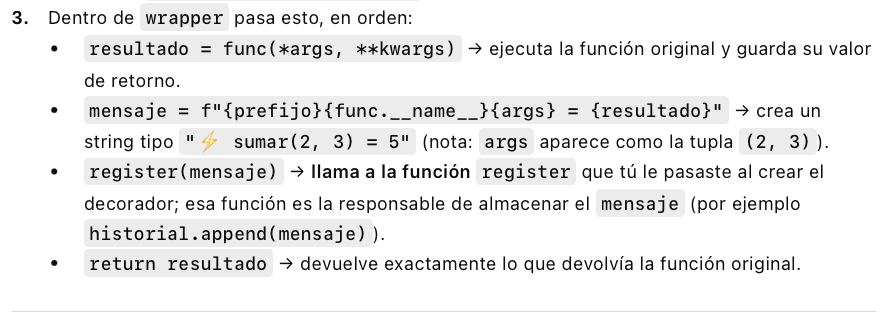

### **Ejercicio 5**:
Crea un decorador limitar_ejecuciones(n) que:
- Permita ejecutar la función como máximo n veces
- Si se llama más veces, devuelva "Máximo de ejecuciones alcanzado"
- Imprima o guarde un mensaje en un historial cada vez que se ejecute

In [44]:
def limitar_ejecuciones(n, mensaje):
    def decorador(func):
        contador = 0
        def envoltura(*args, **kwargs):
            nonlocal contador
            if contador < n:
                contador += 1
                registrar(mensaje)
                resultado = func(*args, **kwargs)
                return resultado
                
            else:
                return "Máximo de ejecuciones alcanzado"
        return envoltura
    return decorador
            
            
@limitar_ejecuciones(2, "Mensaje registrado")
def sumar(a, b):
    return a + b

In [45]:
print(sumar(2, 3))
print(sumar(3, 4))
print(sumar(6, 7))

5
7
Máximo de ejecuciones alcanzado


In [46]:
mostrar()

['Inicio del programa',
 'Ejecutando programa',
 'Programa finalizado',
 'Mensaje registrado',
 'Mensaje registrado',
 'Mensaje registrado',
 'Mensaje registrado',
 'Mensaje registrado',
 'Mensaje registrado',
 'Mensaje registrado',
 'Mensaje registrado',
 'Mensaje registrado',
 'Mensaje registrado']